> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Database_no_show_oppointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

 ‘ScheduledDay’: tells us on what day the patient set up their appointment.
 
 ‘Neighborhood’: indicates the location of the hospital.
 
 ‘Scholarship’" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 
 Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
What are the main factors that might affect on the attendance of the patients on the scheduled day.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
Trying to perfrom some operations on the data in order to make is easier to know exaclty what will affect on the patients

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape


(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can recognize that there is no missing data in our dataset.


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can notice that the min age is -1 which is for sure wrong input , so in the next steps we will try to clean the data.

The avg age is 37 .

The max age is 115.



### Data Cleaning
Removing wrong inputs and correction of spelling of some words if necessary
 

In [7]:
# We will remove the wrong age 
wrong_age=df.query('Age==-1')
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# removinf the negative age
df.drop(index=99832,inplace=True)

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:

# I think that PateientID,Appointmentday,scheduleday and appointmentid are not essential for our data investigation
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# changeing colums names
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_Show'},inplace=True)
df.rename(columns={'Scholarship':'Public_Insurance'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Public_Insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## General look 




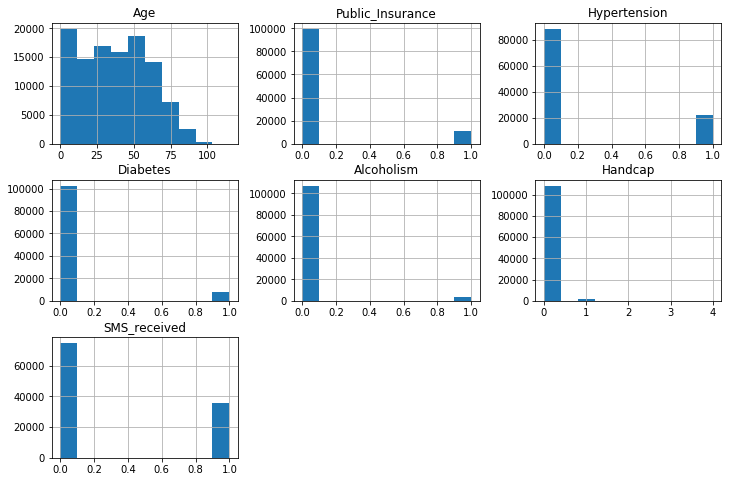

In [12]:
df.hist(figsize=(12,8));

The majority of patients are not (handicapped , suffering from diabetes,alcoholism,suffering from hypertenstion and publicly inscured).
Almost half of them received sms.

In [13]:
# spliting the dataset into show or no show in order to have accurate analysis
attendant = df.No_Show =='No'
absent = df.No_Show =='Yes'


In [14]:
df[attendant].count()

Gender              88207
Age                 88207
Neighbourhood       88207
Public_Insurance    88207
Hypertension        88207
Diabetes            88207
Alcoholism          88207
Handcap             88207
SMS_received        88207
No_Show             88207
dtype: int64

In [15]:
df[attendant].mean()


Age                 37.790504
Public_Insurance     0.093904
Hypertension         0.204394
Diabetes             0.073838
Alcoholism           0.030417
Handcap              0.022742
SMS_received         0.291337
dtype: float64

In [16]:
df[absent].count()

Gender              22319
Age                 22319
Neighbourhood       22319
Public_Insurance    22319
Hypertension        22319
Diabetes            22319
Alcoholism          22319
Handcap             22319
SMS_received        22319
No_Show             22319
dtype: int64

In [17]:
df[absent].mean()

Age                 34.317667
Public_Insurance     0.115507
Hypertension         0.169004
Diabetes             0.064071
Alcoholism           0.030333
Handcap              0.020297
SMS_received         0.438371
dtype: float64

The number of patients who went to their appointments almost 4 times the patients who did not go .

The mean age for attending the appointment is 37.

The mean for not attending is 34.


EXPLORING DATA USING PLOTS

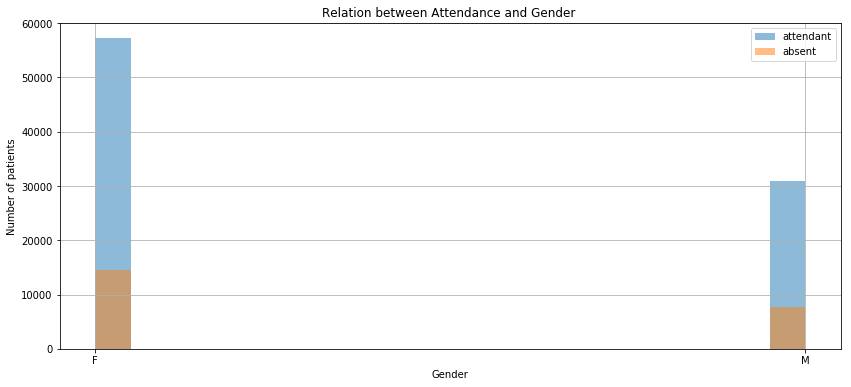

In [18]:
# number of attendance according to gender
plt.figure(figsize=[14,6])
df.Gender[attendant].hist(alpha=0.5,bins=20,label='attendant')
df.Gender[absent].hist(alpha=0.5,bins=20,label='absent')
plt.legend()
plt.title('Relation between Attendance and Gender ')
plt.xlabel('Gender')
plt.ylabel('Number of patients');



The most of patients are females either they attend or no.
Most of them attend their appointments.

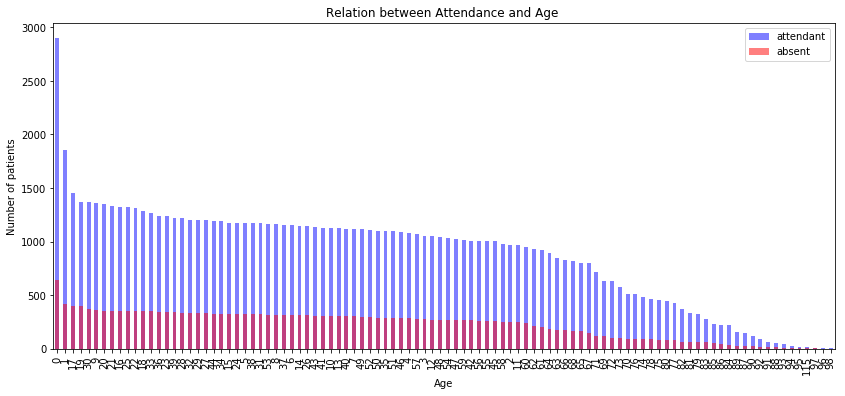

In [19]:
# # number of attendance according to age

plt.figure(figsize=[14,6])
df.Age[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Age[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Age ')
plt.xlabel('Age')
plt.ylabel('Number of patients');


The most of people who went to the appointments are till 10 years old.
The more the people are ageing the less they go to the oppointments which should be noticed by the gouvernemt, because they should take more care of older people

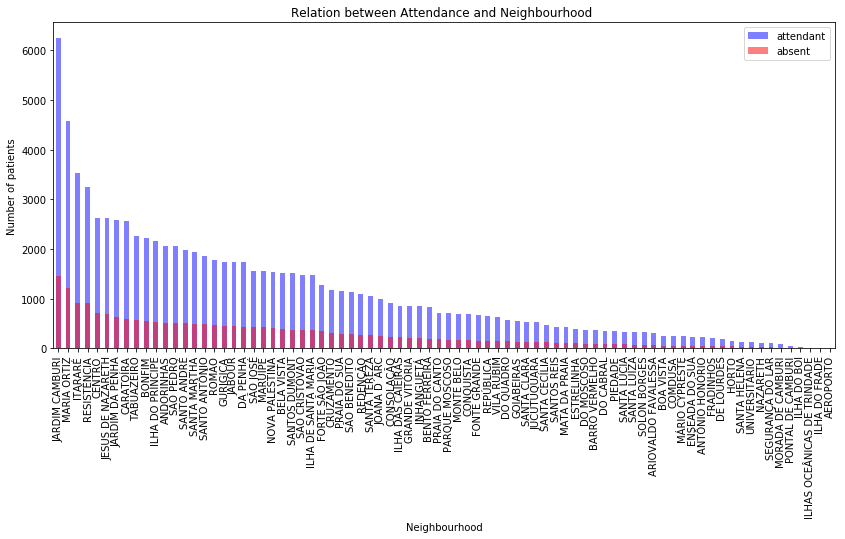

In [21]:
# # number of attendance according to neighbourhood
plt.figure(figsize=[14,6])
df.Neighbourhood[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Neighbourhood[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Neighbourhood ')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');

JARDIM CAMBURI is the highest city of population for people who went to their appointmnets.

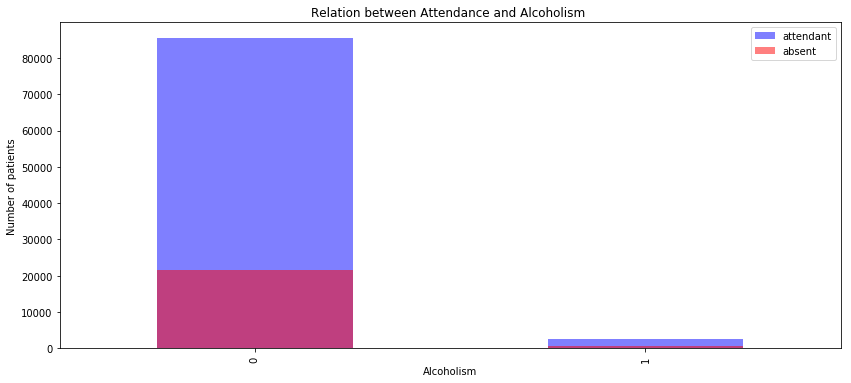

In [20]:
# # number of attendance according to alcoholism
plt.figure(figsize=[14,6])
df.Alcoholism[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Alcoholism[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Alcoholism ')
plt.xlabel('Alcoholism')
plt.ylabel('Number of patients');

Most of peolpe who went to appointments are not alcoholic

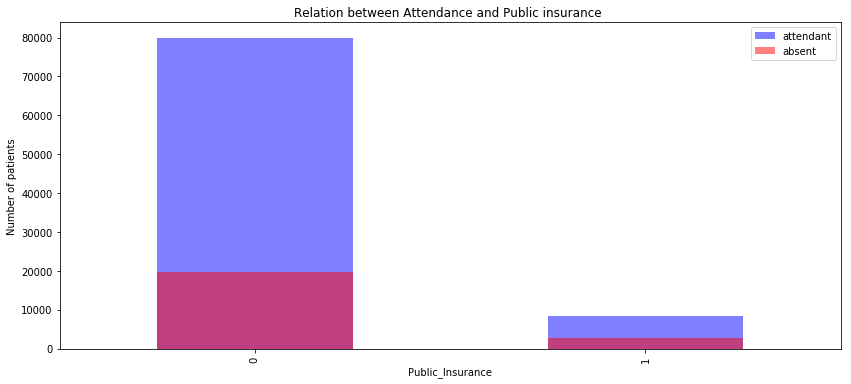

In [23]:
# number of attendance according to whether the patients are publicly insured or no
plt.figure(figsize=[14,6])
df.Public_Insurance[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Public_Insurance[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Public insurance ')
plt.xlabel('Public_Insurance')
plt.ylabel('Number of patients');

Most of people who went to appoinments are not using public insurance.

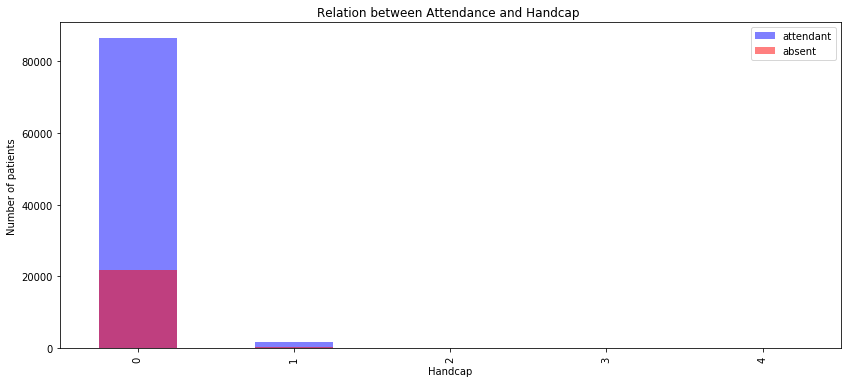

In [25]:
plt.figure(figsize=[14,6])
df.Handcap[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Handcap[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Handcap ')
plt.xlabel('Handcap')
plt.ylabel('Number of patients');

Most of people who went to their appointments are not handicapped

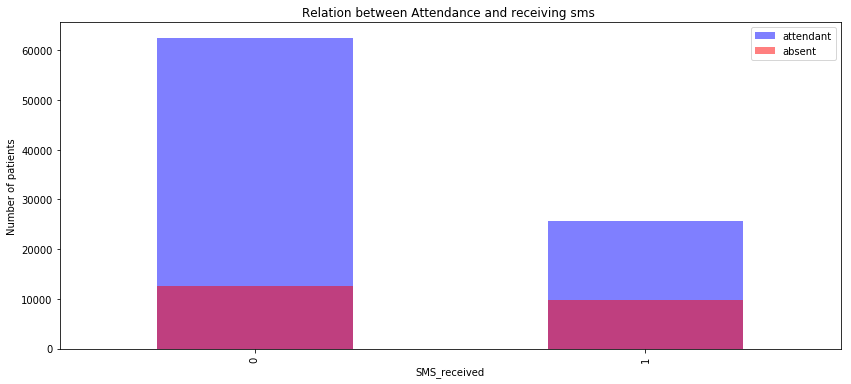

In [27]:
plt.figure(figsize=[14,6])
df.SMS_received[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.SMS_received[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and receiving sms ')
plt.xlabel('SMS_received')
plt.ylabel('Number of patients');

The majority have not received sms which is something  the gouvernment should work on make it more accurate 

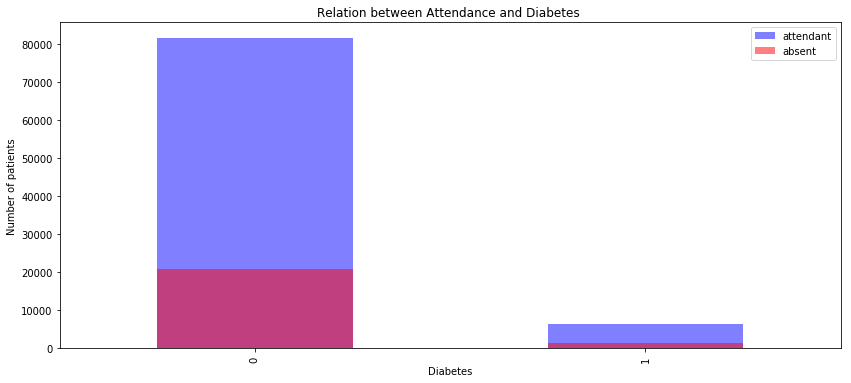

In [28]:
plt.figure(figsize=[14,6])
df.Diabetes[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Diabetes[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend();
plt.title('Relation between Attendance and Diabetes ')
plt.xlabel('Diabetes')
plt.ylabel('Number of patients');

Most of people who went to appointments does not have diabetes

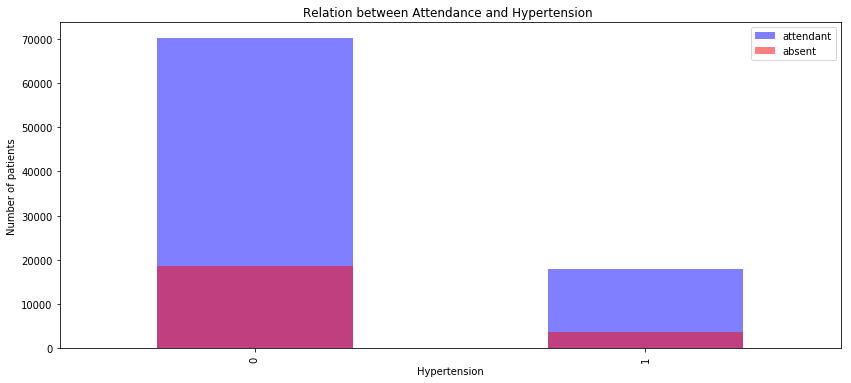

In [29]:
plt.figure(figsize=[14,6])
df.Hypertension[attendant].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='attendant')
df.Hypertension[absent].value_counts().plot(kind='bar',alpha=0.5,color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and Hypertension ')
plt.xlabel('Hypertension')
plt.ylabel('Number of patients');

Most of people who went to appointments  does not have hypertension.

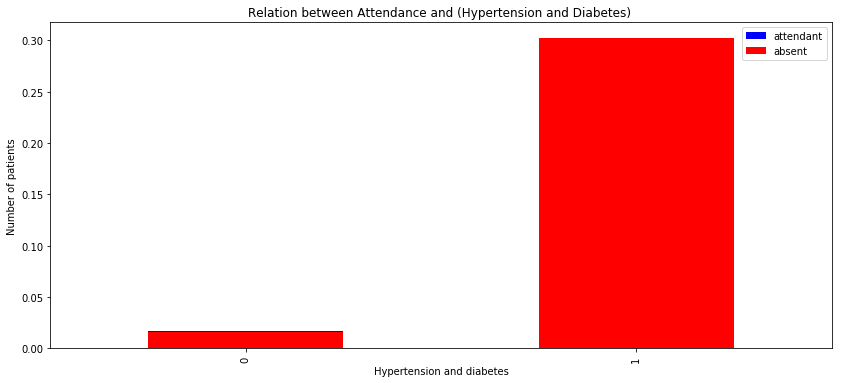

In [43]:
plt.figure(figsize=[14,6])
df[attendant].groupby('Hypertension').Diabetes.mean().plot(kind='bar',color='blue',label='attendant')
df[absent].groupby('Hypertension').Diabetes.mean().plot(kind='bar',color='red',label='absent')
plt.legend()
plt.title('Relation between Attendance and (Hypertension and Diabetes) ')
plt.xlabel('Hypertension and diabetes')
plt.ylabel('Number of patients');

hypertension and diabets are not from the main factors that prevents people from going to their appointments

<a id='conclusions'></a>
## Conclusions

-I think that there are two main factors that might affect  going to the appointment:

1-Age

2-Neighbourhood

-The gouvernment should make sure that all the patients receive SMS

-The gouvernmnet should work on helping older people to go to their appointments,because they are almost the lowest category that goes to their appointments.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0